In [110]:
# For Analysis And Plotting
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#  Libraries for Cleaning the Text
import neattext as nt
import neattext.functions as nfx
import re
import string

# For Training and Saving the Model
from sklearn.metrics import roc_auc_score 
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split 
import pickle



In [111]:
#importing the training data
traindf = pd.read_csv("training.csv")

In [112]:
traindf

,ID,Tweet,Labels
0,1,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,0 10
1,2,BanMediaHouse whose is responsible for spreadi...,6
2,3,Im waiting for someone to say to me that all t...,3 4
3,4,He is a liar. Proven day night. Time again. Li...,6
4,5,"NEW: U.S. CoronaVirus death toll reaches 4,000...",8
...,...,...,...
4995,4996,Life Insurance? I wonder if policies are payin...,4 5 7
4996,4997,My cousin passed away from the corona virus to...,4 5
4997,4998,I guess Mother Nature really hates us. Yellows...,3 5 9 10
4998,4999,So question for the day that isnt related to c...,9 10


In [113]:
# applying the splitting in the labels column for further use
traindf['Labels'] = traindf['Labels'].apply(lambda x: [int(i) for i in x.split()] )

In [114]:
# defining the definition of each labels in the dictionary format
# this dict we are going to use for creating the extra columns for training over model
class_map = {
    "optimistic": 0,
    "thankful": 1,
    "empathetic": 2,
    "pessimistic": 3,
    "anxious": 4,
    "sad": 5,
    "annoyed": 6,
    "denial": 7,
    "surprise": 8,
    "official_report": 9,
    "joking": 10
}

In [115]:
# this function we are using for creating/ adding the columns and populating them on the basis of the labels
for k,v in class_map.items():
    traindf[k]=traindf['Labels'].apply(lambda x: 1 if v  in x else 0)
    traindf[k]=traindf[k].astype(float) # converting the numbers into float

In [116]:
traindf # new dataframe looks like this

,ID,Tweet,Labels,optimistic,thankful,empathetic,pessimistic,anxious,sad,annoyed,denial,surprise,official_report,joking
0,1,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,"[0, 10]",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,BanMediaHouse whose is responsible for spreadi...,[6],0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,Im waiting for someone to say to me that all t...,"[3, 4]",0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,He is a liar. Proven day night. Time again. Li...,[6],0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,"NEW: U.S. CoronaVirus death toll reaches 4,000...",[8],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,Life Insurance? I wonder if policies are payin...,"[4, 5, 7]",0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4996,4997,My cousin passed away from the corona virus to...,"[4, 5]",0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4997,4998,I guess Mother Nature really hates us. Yellows...,"[3, 5, 9, 10]",0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4998,4999,So question for the day that isnt related to c...,"[9, 10]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [117]:
list(class_map.keys())

['optimistic',
 'thankful',
 'empathetic',
 'pessimistic',
 'anxious',
 'sad',
 'annoyed',
 'denial',
 'surprise',
 'official_report',
 'joking']

In [118]:
%%time
categorical = []
numerical = []

#This loop is basically for separating the categorical and numerical variable
for i in traindf.columns:
    if traindf[i].dtype=='O':
        categorical.append(i)
    else:
        numerical.append(i)

Wall time: 3.01 ms


In [119]:
numerical.remove('ID')

In [120]:
categorical

['Tweet', 'Labels']

In [121]:
start='\033[1m'
end='\033[0;0m'       
font = {'family': 'serif',
            'weight': 'normal',
            'size': 30,
            }
#function for ploting bar graph for each column of the dataframe
def plot_each_columns(data):
    for i in data.columns:
        
        df = data[i].value_counts()
        plt.figure(figsize=(30,10))
        sns.barplot(x=df.index, y=df)
        plt.xticks(rotation=90,fontsize = 20)
        plt.yticks(fontsize = 20)
        plt.title(i,fontdict=font)

        

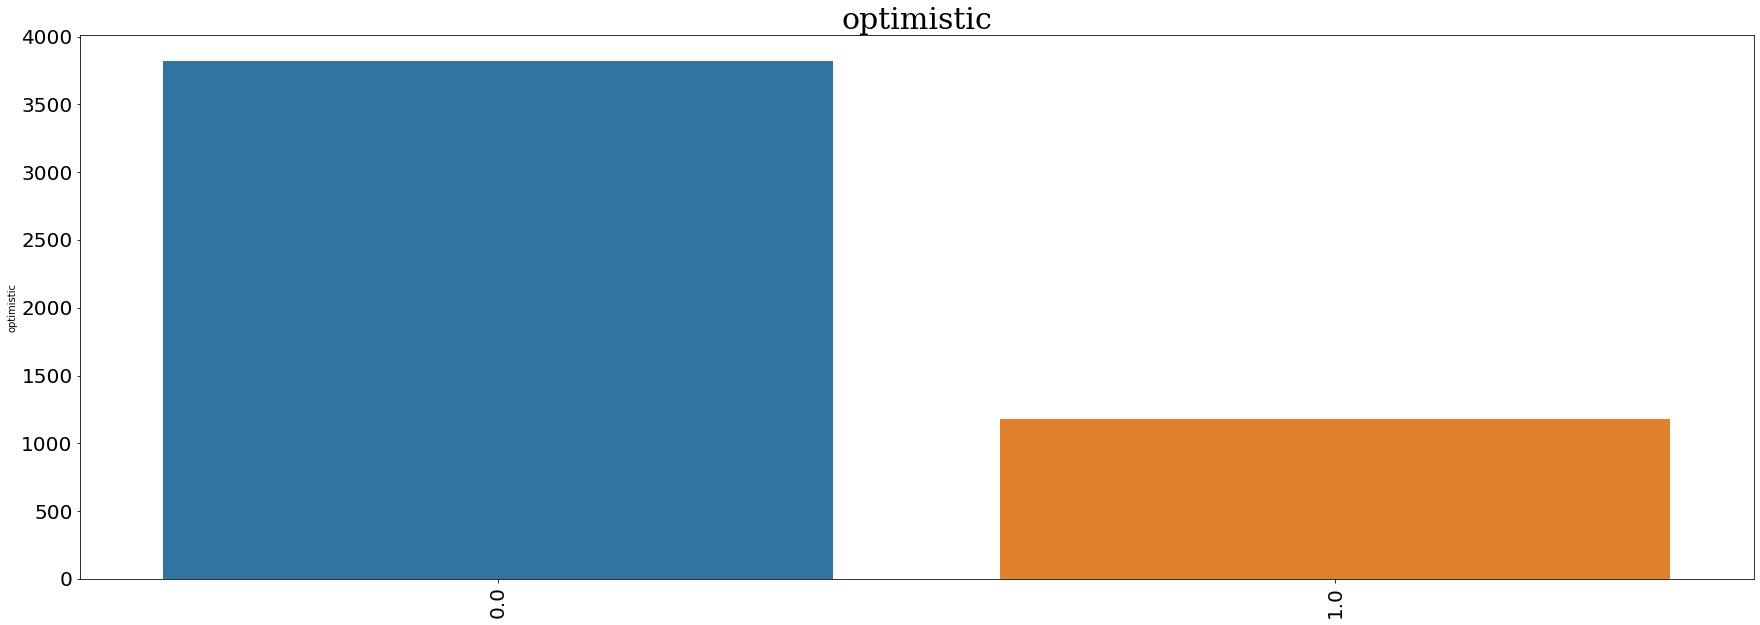

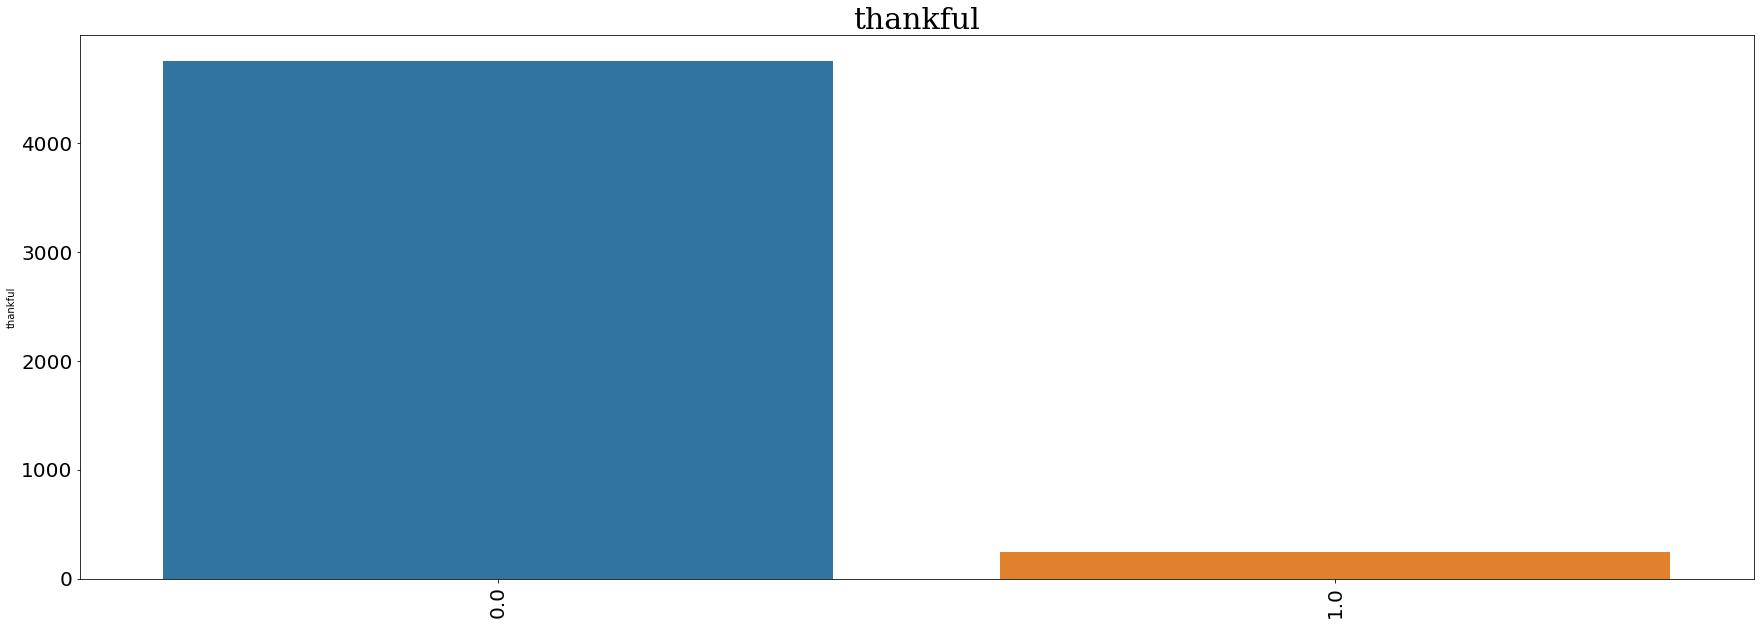

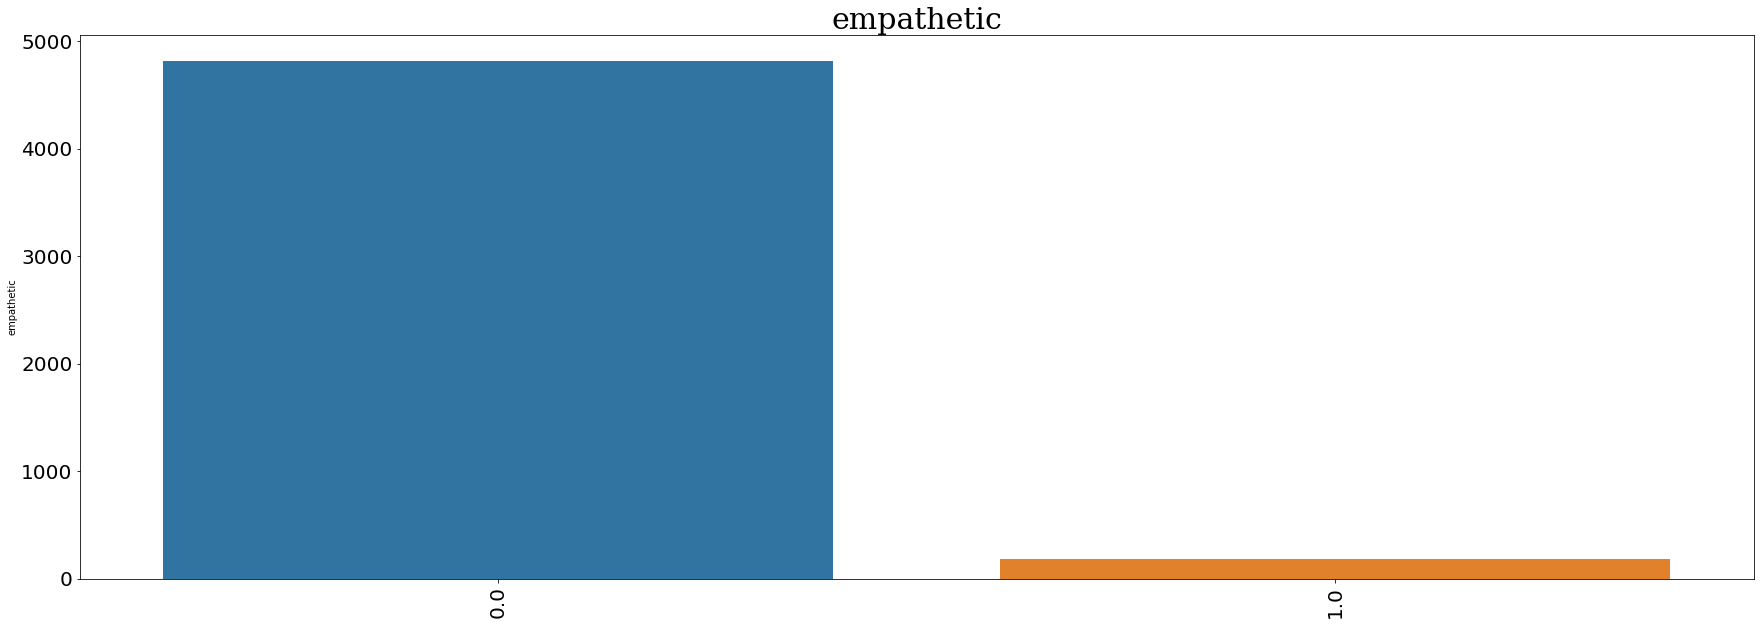

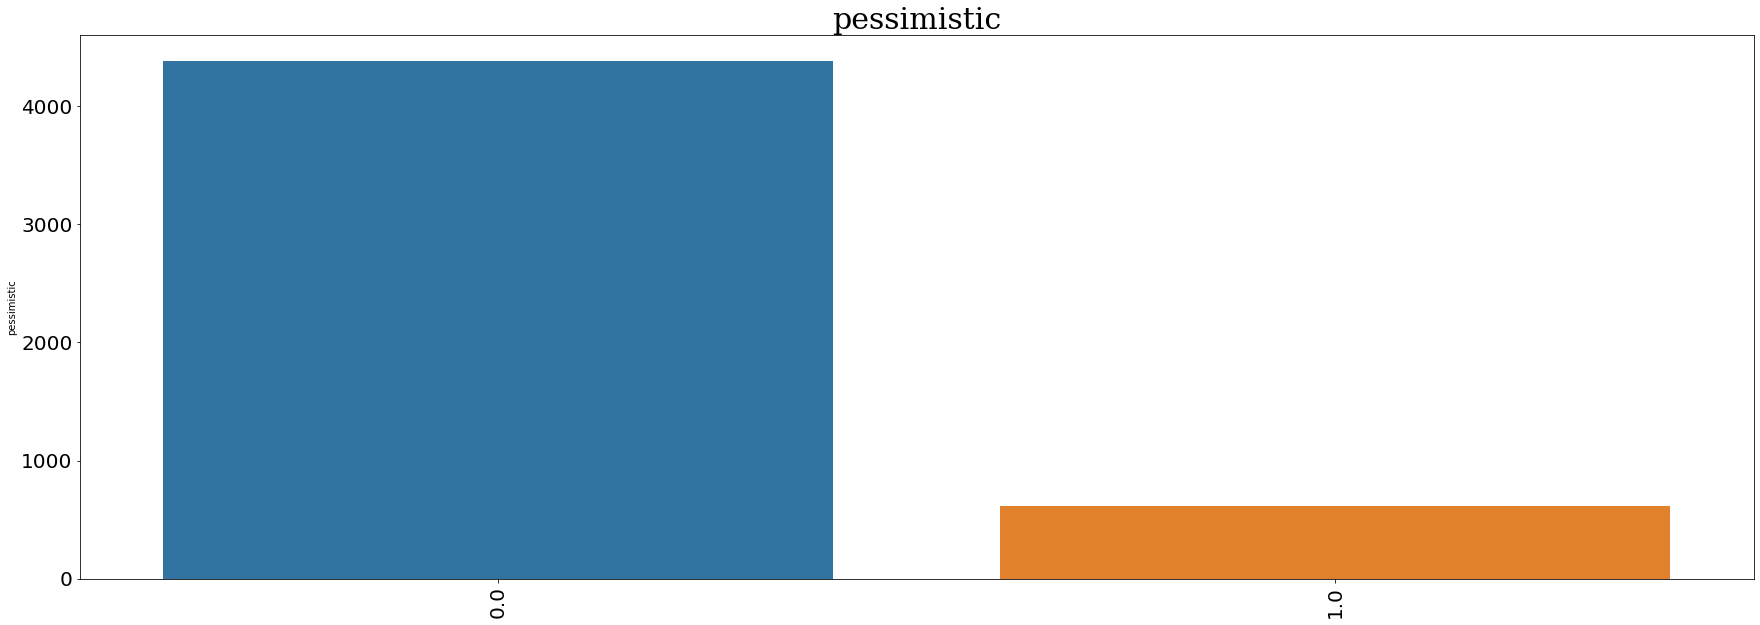

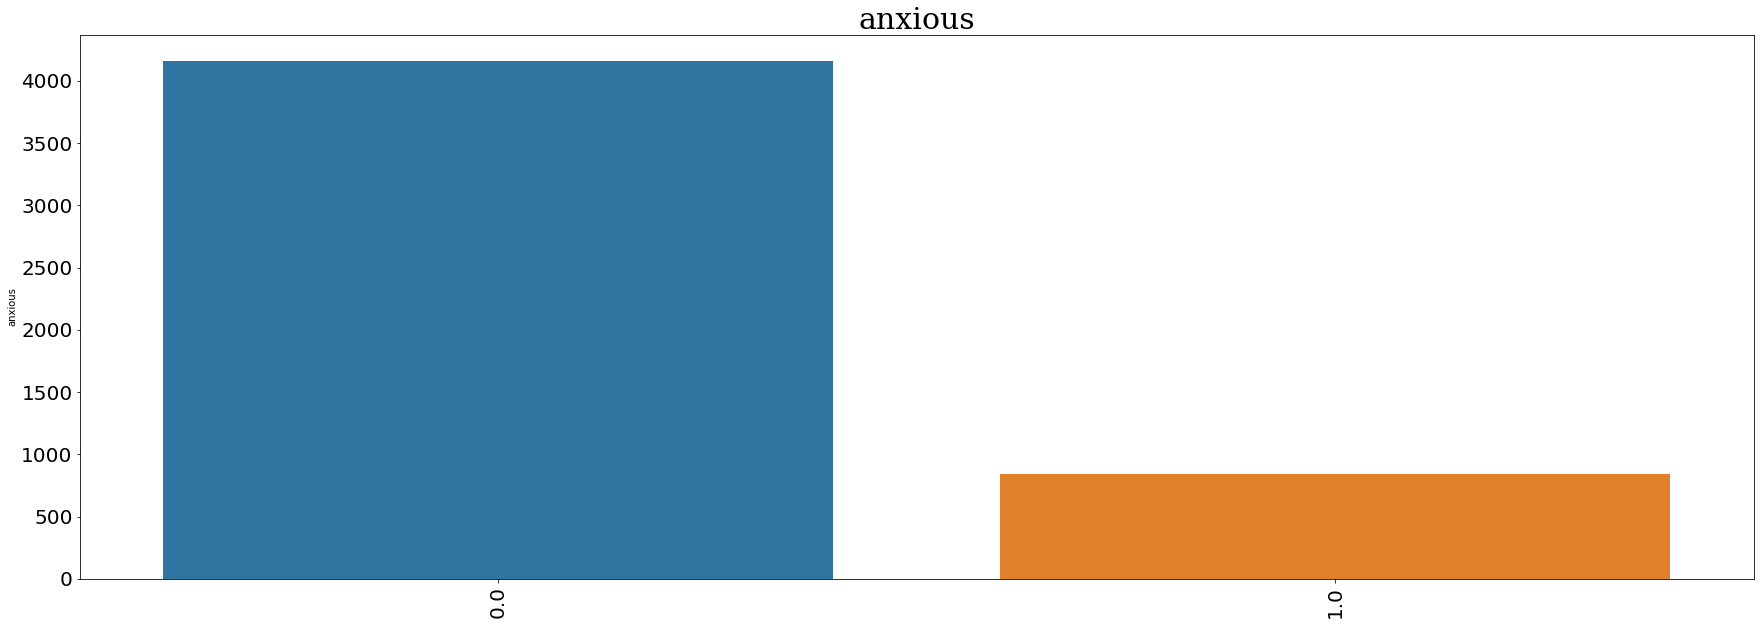

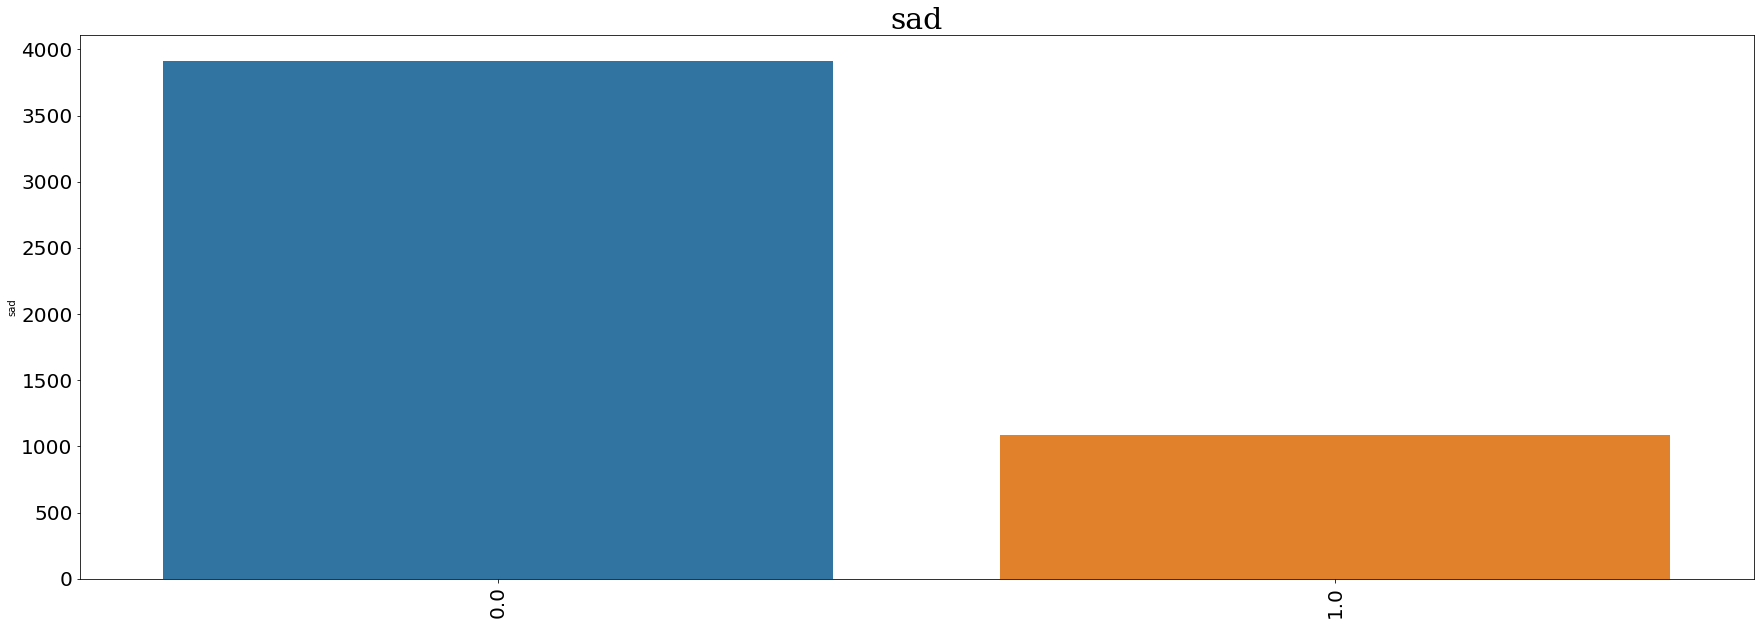

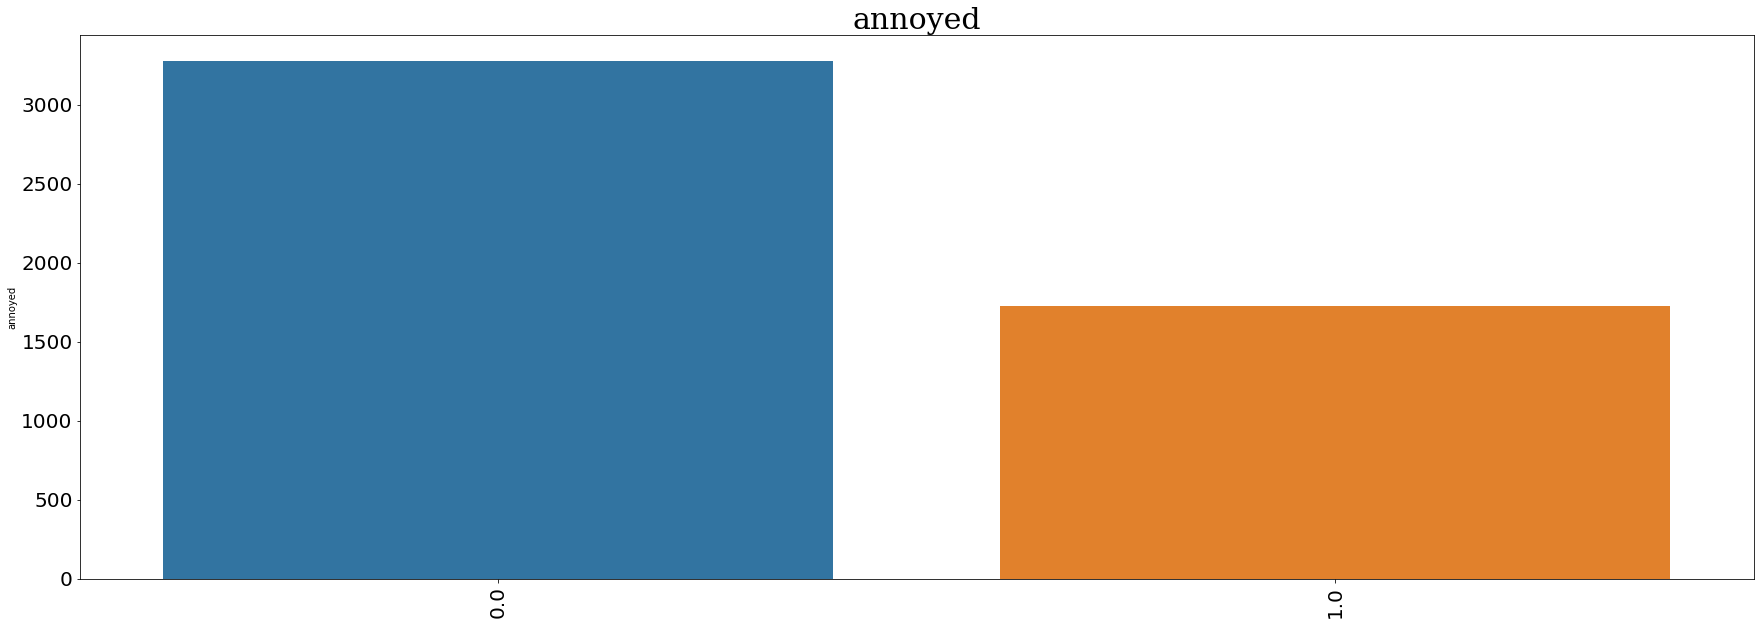

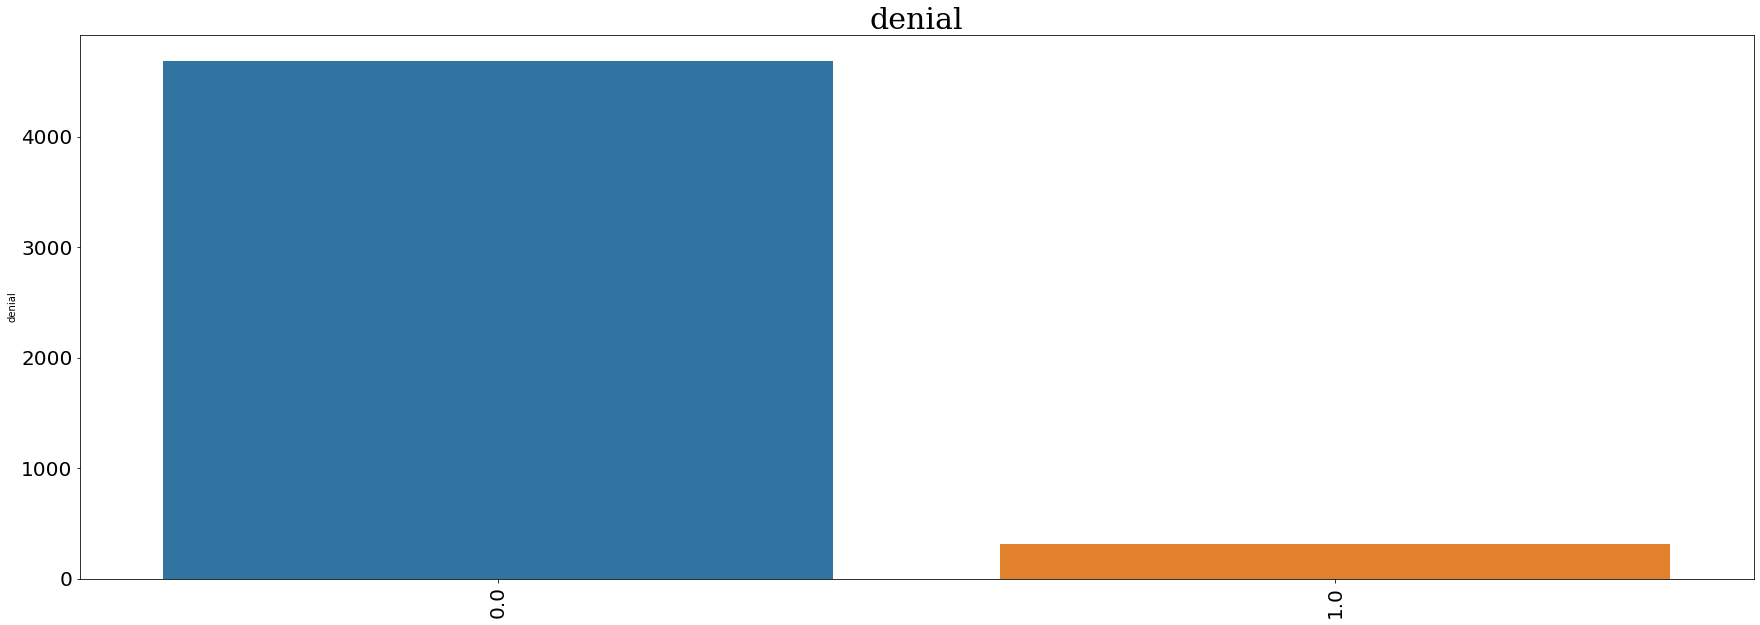

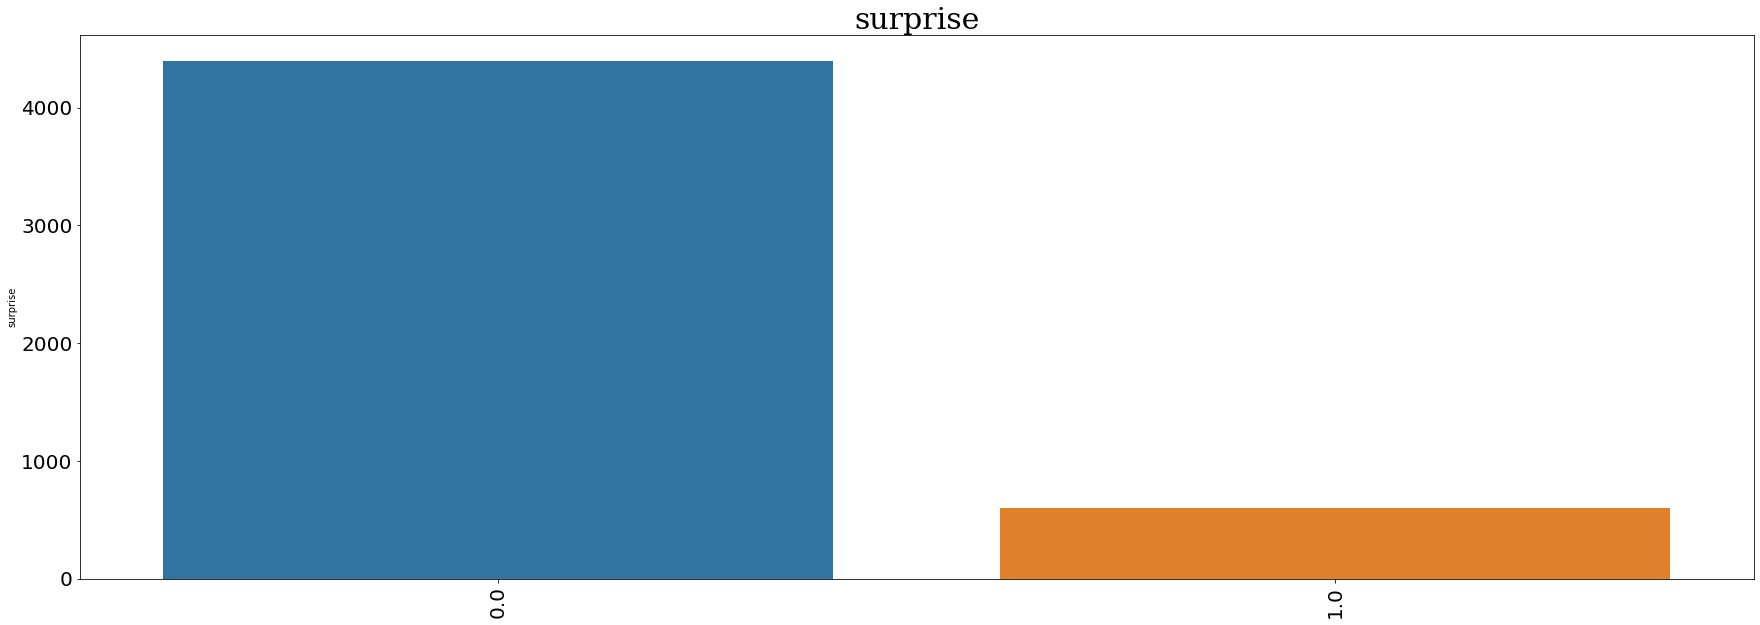

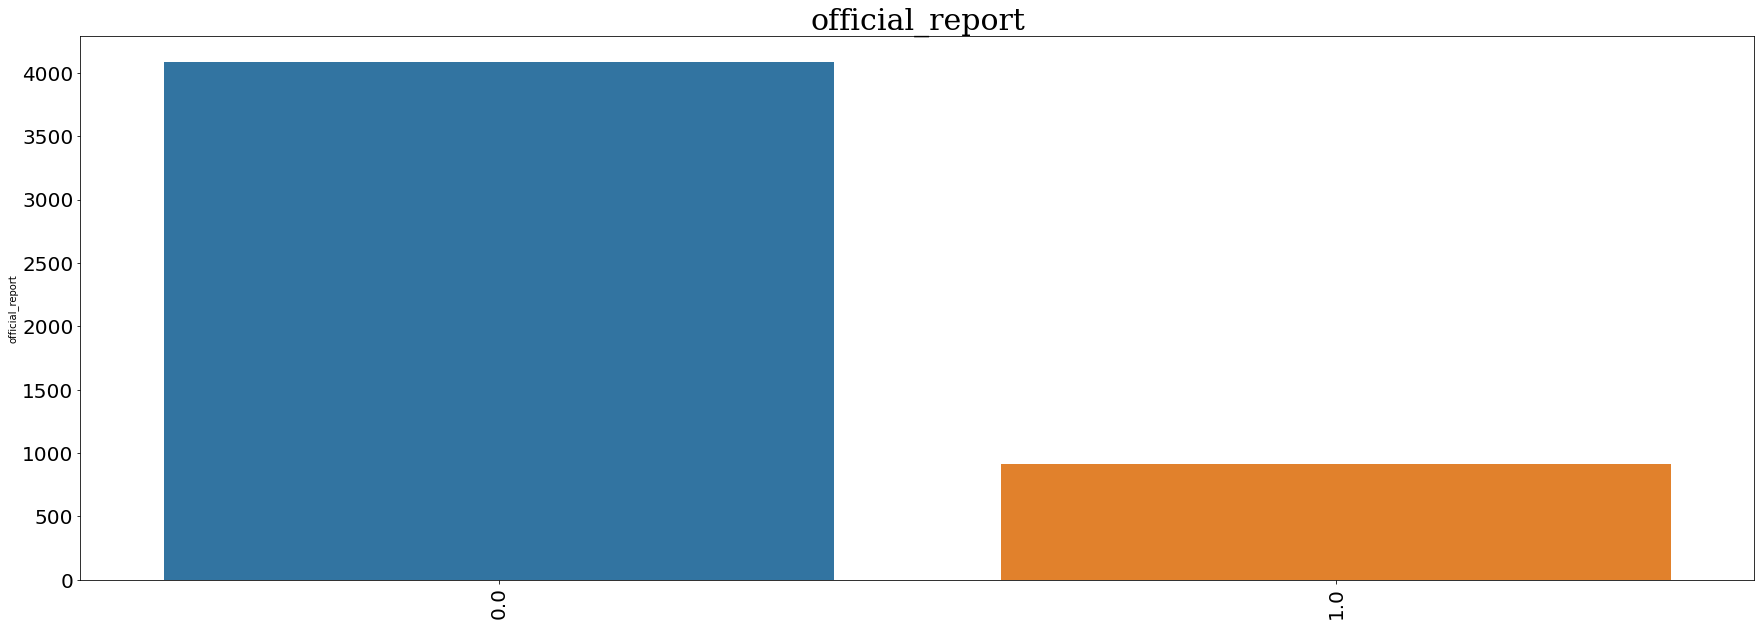

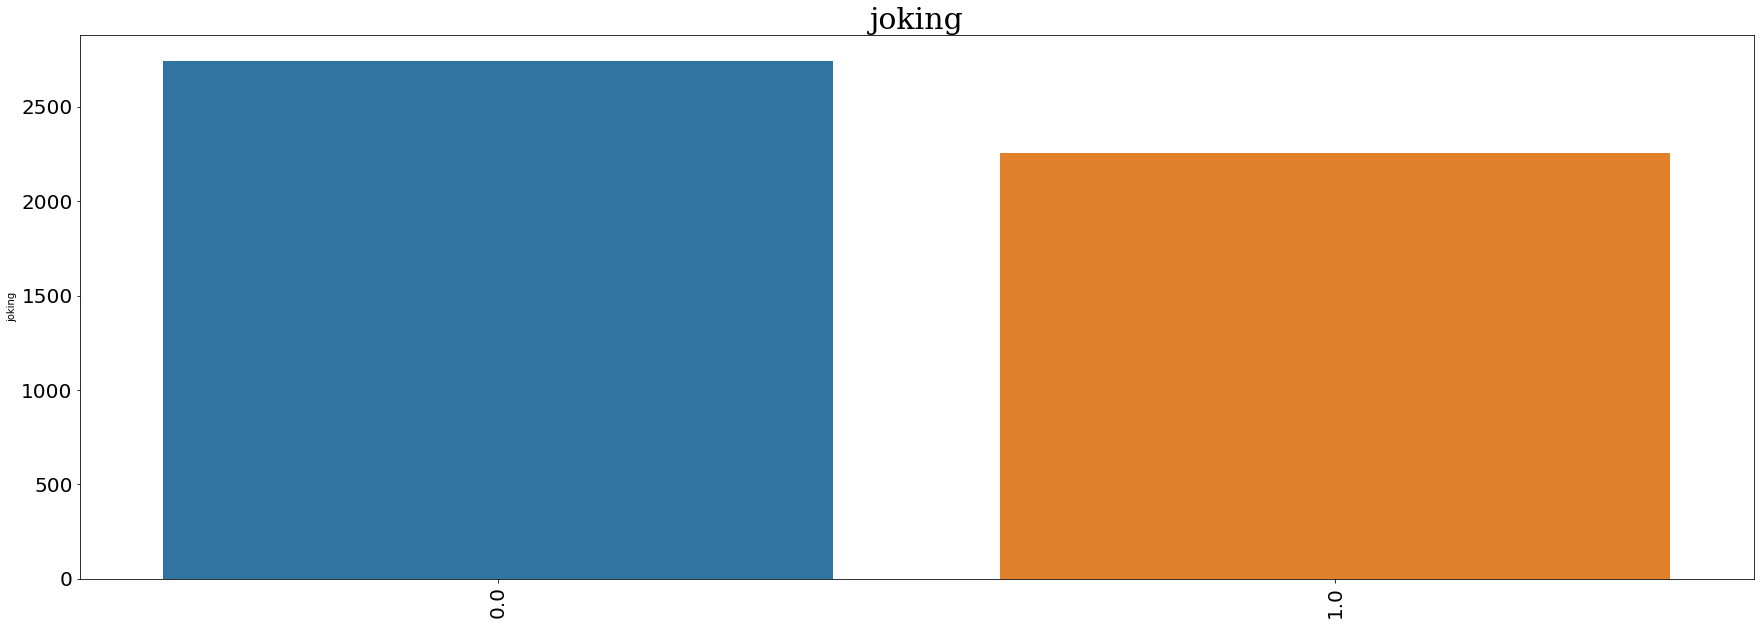

In [122]:
plot_each_columns(traindf[numerical])

In [123]:
counts=[]
for i in numerical:
    counts.append((i, traindf[i].sum()))
df_stats = pd.DataFrame(counts, columns=['label', 'number_of_comments'])
df_stats

,label,number_of_comments
0,optimistic,1180.0
1,thankful,244.0
2,empathetic,186.0
3,pessimistic,620.0
4,anxious,842.0
5,sad,1088.0
6,annoyed,1725.0
7,denial,314.0
8,surprise,604.0
9,official_report,914.0


Text(0.5, 0, 'Label')

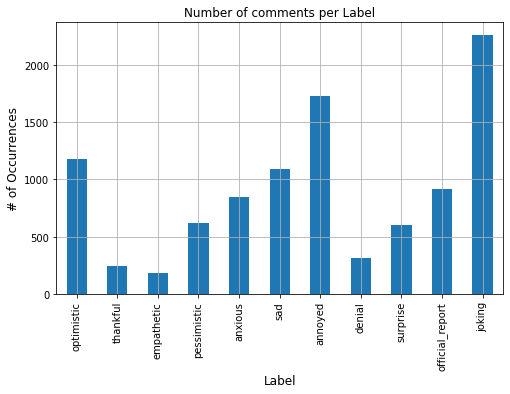

In [124]:
#Number of comments in each category
df_stats.plot(x='label', y='number_of_comments', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title("Number of comments per Label")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Label', fontsize=12)

D:\anaconda3\envs\pyspark\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'No of labels')

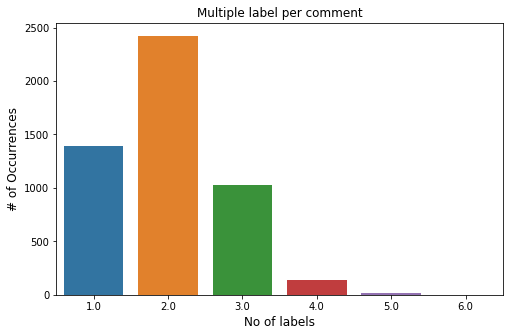

In [125]:
# How many comments have multi labels?
rowsums = traindf.iloc[:,3:].sum(axis=1)
x=rowsums.value_counts()
#plot
plt.figure(figsize=(8,5))
ax = sns.barplot(x.index, x.values)
plt.title("Multiple label per comment")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('No of labels', fontsize=12)

<AxesSubplot:>

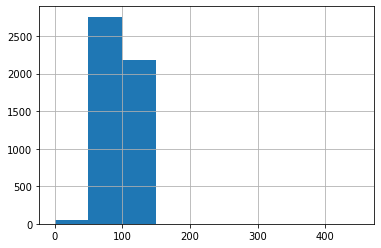

In [126]:
# The distribution of the number of words in comment texts
lens = traindf.Tweet.str.len()
lens.hist(bins = np.arange(0,500,50))

In [127]:
traindf[numerical].corr()
traindf[numerical].corr().style.background_gradient(cmap ='coolwarm')

,optimistic,thankful,empathetic,pessimistic,anxious,sad,annoyed,denial,surprise,official_report,joking
optimistic,1.000000,0.101473,0.092344,-0.073342,-0.089000,-0.139001,-0.234925,-0.068153,-0.087503,-0.039854,-0.022387
thankful,0.101473,1.000000,0.009433,-0.059869,-0.062237,-0.083454,-0.107755,-0.024195,0.010040,0.008158,-0.127112
empathetic,0.092344,0.009433,1.000000,-0.048302,-0.029150,-0.019142,-0.102641,-0.033458,-0.069618,-0.057421,-0.116716
pessimistic,-0.073342,-0.059869,-0.048302,1.000000,0.035013,-0.020460,-0.043275,0.020171,-0.079874,0.023023,-0.018131
anxious,-0.089000,-0.062237,-0.029150,0.035013,1.000000,0.007488,-0.069132,-0.017354,-0.058568,0.020855,-0.136479
sad,-0.139001,-0.083454,-0.019142,-0.020460,0.007488,1.000000,-0.008524,-0.072579,-0.048235,-0.075104,-0.110187
annoyed,-0.234925,-0.107755,-0.102641,-0.043275,-0.069132,-0.008524,1.000000,0.025441,-0.195430,-0.055875,-0.136681
denial,-0.068153,-0.024195,-0.033458,0.020171,-0.017354,-0.072579,0.025441,1.000000,-0.035241,0.110062,-0.074117
surprise,-0.087503,0.010040,-0.069618,-0.079874,-0.058568,-0.048235,-0.195430,-0.035241,1.000000,0.080326,-0.273340
official_report,-0.039854,0.008158,-0.057421,0.023023,0.020855,-0.075104,-0.055875,0.110062,0.080326,1.000000,-0.110826


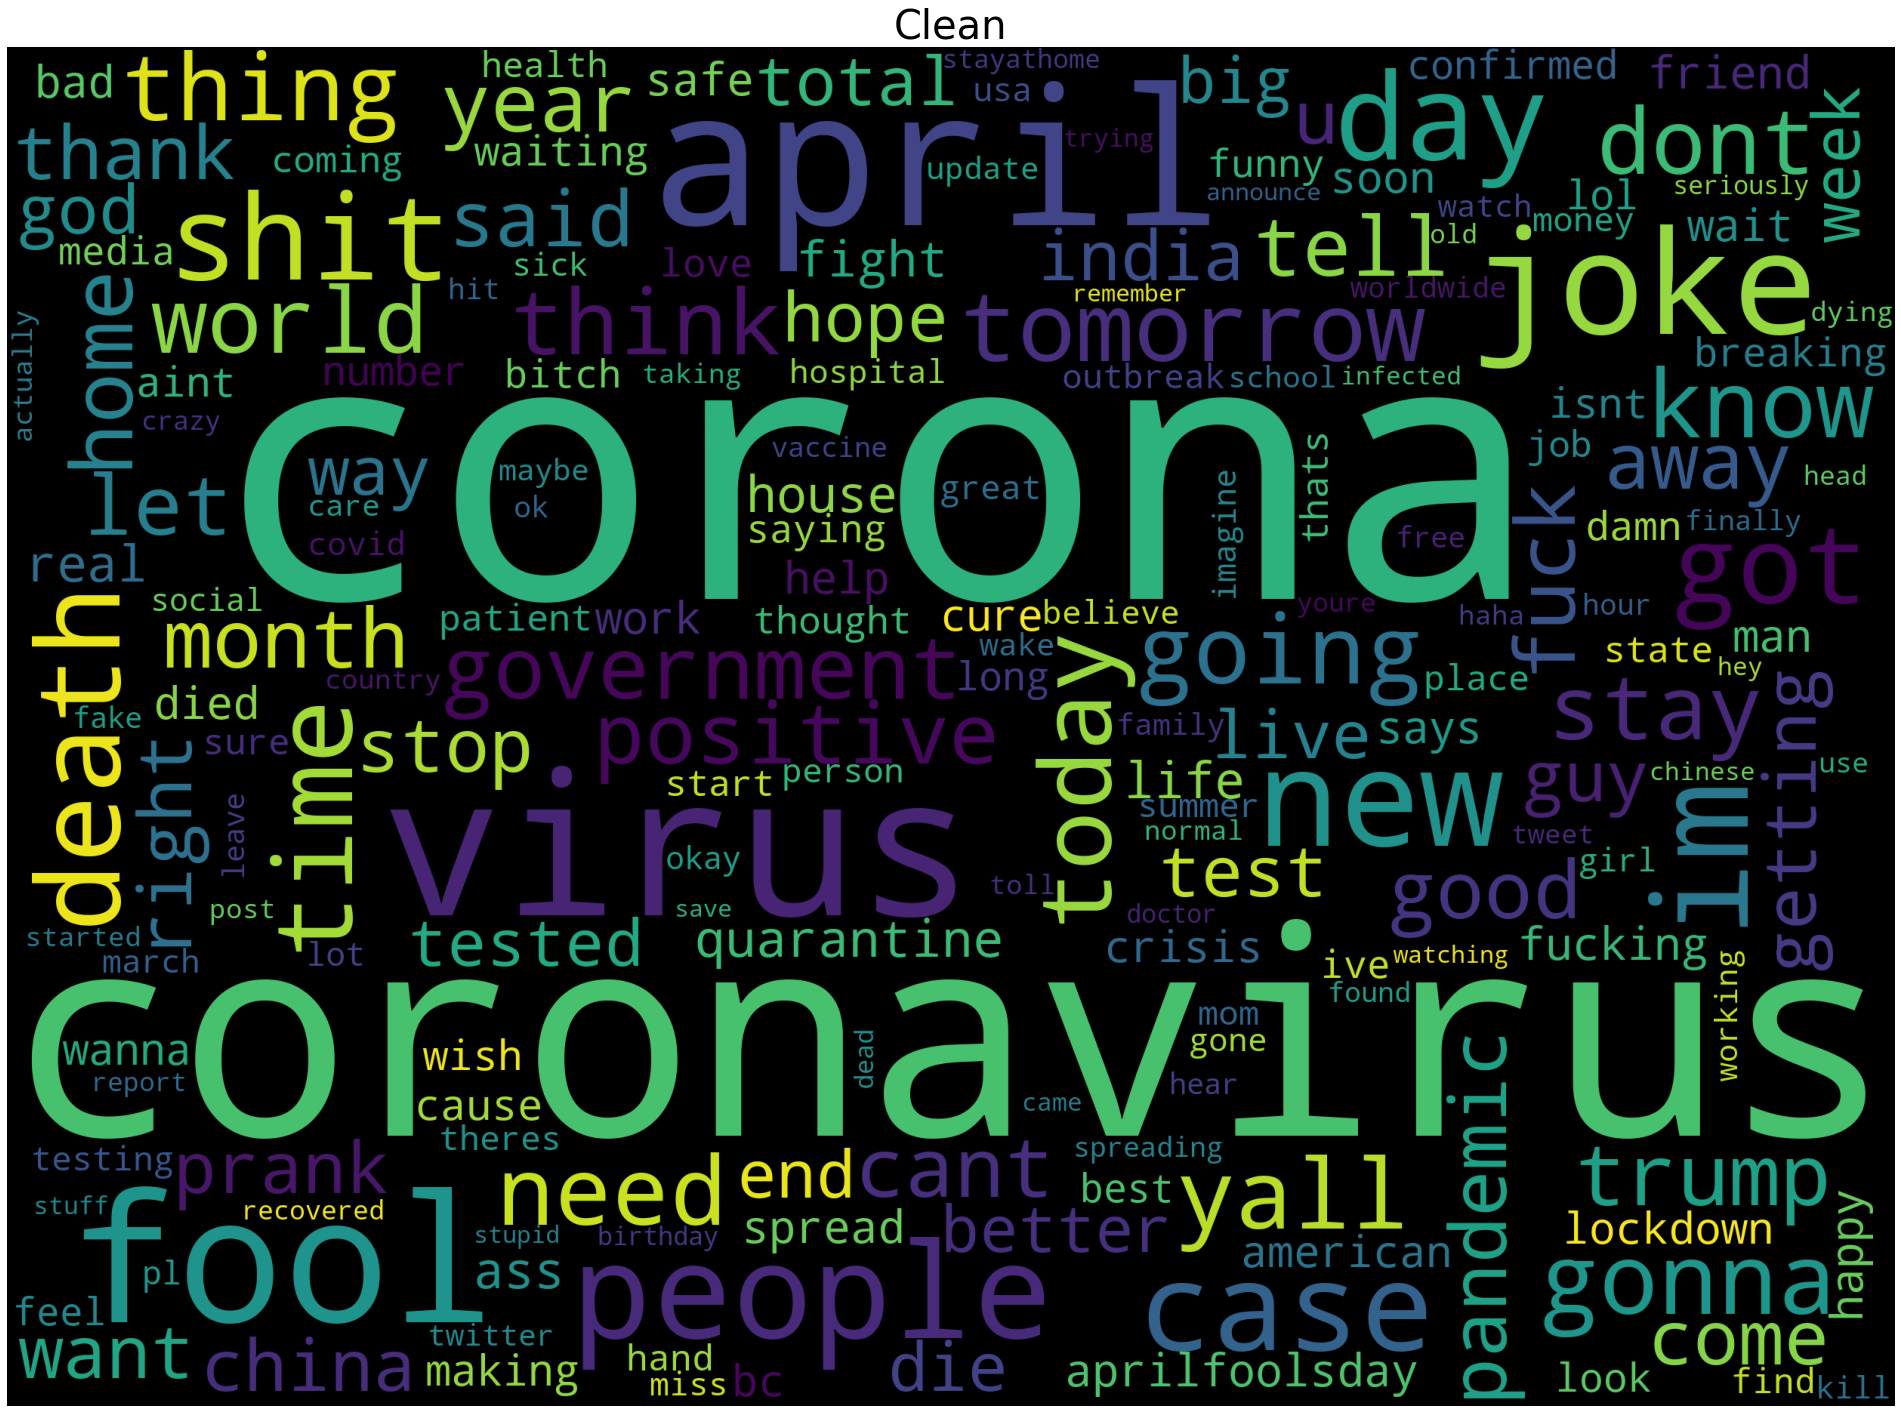

In [154]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(40,25))
text = traindf.Tweet.values
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Clean",fontsize=40)
plt.imshow(cloud_toxic)

In [128]:
# defining a function for cleaning the tweets removing some specific words and punctuations
def  clean_text(text):
    text =  text.lower()
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"\r", "", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "that is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"how's", "how is", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"n'", "ng", text)
    text = re.sub(r"'bout", "about", text)
    text = re.sub(r"'til", "until", text)
    text = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", text)
    text = text.translate(str.maketrans('', '', string.punctuation)) 
    text = re.sub("(\\W)"," ",text) 
    text = re.sub('\S*\d\S*\s*','', text)
    
    return text
traindf['Tweet'] = traindf['Tweet'].apply(lambda x:clean_text(x))

In [129]:
# now using neattext for removing the stopwards from the tweets which are creating noise in the data

traindf['Tweet'].apply(lambda x:nt.TextFrame(x).noise_scan())
traindf['Tweet'].apply(lambda x:nt.TextExtractor(x).extract_stopwords())
traindf['Tweet'].apply(nfx.remove_stopwords)
traindf['Tweet']= traindf['Tweet'].apply(nfx.remove_stopwords)

In [130]:
traindf.isna().sum() #checking for null values in the data

ID                 0
Tweet              0
Labels             0
optimistic         0
thankful           0
empathetic         0
pessimistic        0
anxious            0
sad                0
annoyed            0
denial             0
surprise           0
official_report    0
joking             0
dtype: int64

In [131]:
# Dividing the data into input and output variables
X =  traindf.Tweet
y =  traindf.drop(['ID','Labels','Tweet'],axis = 1)

In [132]:
# splitting the data into train and validation 
X_train,X_valid, y_train,y_valid= train_test_split(X,y,test_size=0.2, random_state=1)

In [133]:
X_train

1233    today babys birthday corona virus celebrate co...
1056    coronavirus created schools stop april fools d...
1686    mr president lie seriousness coronavirus threa...
187     wild pandemic big april fools day prank aprilf...
3840    thailand confirms new coronavirus cases deaths...
                              ...                        
2895            let know keeps coronavirus away worth try
2763    tory lanes french battle infected corona messy...
905     tomorrow day millions contract coronavirus rea...
3980                wanna beat corona ass beach w friends
235     breaking tablighi jamat donates coronavirus pa...
Name: Tweet, Length: 4000, dtype: object

In [134]:
y_train

,optimistic,thankful,empathetic,pessimistic,anxious,sad,annoyed,denial,surprise,official_report,joking
1233,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1686,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
187,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2895,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2763,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
905,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3980,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [135]:
# defining the word vectorizier for converting the tweets into vectors
word_vectorizer = TfidfVectorizer(
    strip_accents='unicode',     
    analyzer='word',            
    token_pattern=r'\w{1,}',    
    ngram_range=(1, 3),         
    stop_words='english',
    sublinear_tf=True)

word_vectorizer.fit(X_train)    
train_word_features = word_vectorizer.transform(X_train)
X_train_transformed = word_vectorizer.transform(X_train)
X_valid_transformed = word_vectorizer.transform(X_valid)

In [136]:
#Saving vectorizer

pickle.dump(word_vectorizer, open("vectorizer.pkl", "wb"))

In [137]:

# Testing phase
tf1 = pickle.load(open("vectorizer.pkl", 'rb'))

# Create new tfidfVectorizer with old vocabulary

word_vectorizer1 = TfidfVectorizer(
    strip_accents='unicode',     
    analyzer='word',            
    token_pattern=r'\w{1,}',    
    ngram_range=(1, 3),         
    stop_words='english',
    sublinear_tf=True,
    vocabulary = tf1.vocabulary_)
X_valid_transformed = word_vectorizer1.fit_transform(X_valid)

In [138]:
y_train

,optimistic,thankful,empathetic,pessimistic,anxious,sad,annoyed,denial,surprise,official_report,joking
1233,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1686,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
187,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2895,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2763,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
905,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3980,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [139]:
# defining the classifier here we are using SGDclassifier 
# Stochastic Gradient Descent (SGD) is a simple yet efficient optimization algorithm used to find the values of parameters/coefficients of  functions that minimize a cost function.
# OneVsRestClassifier is the heuristic method for using binary classification algorithms for multi-class classification

classifier = OneVsRestClassifier(SGDClassifier(random_state=0,loss='log',alpha=0.00001,penalty='elasticnet'))
classifier.fit(X_train_transformed, y_train.values)


y_train_pred_proba = classifier.predict_proba(X_train_transformed)
y_valid_pred_proba = classifier.predict_proba(X_valid_transformed)


roc_auc_score_train = roc_auc_score(y_train, y_train_pred_proba,average='weighted')
roc_auc_score_test = roc_auc_score(y_valid, y_valid_pred_proba,average='weighted')

print("ROC AUC Score Train:", roc_auc_score_train)
print("ROC AUC Score Test:", roc_auc_score_test)

y_train_pred_proba = classifier.predict_proba(X_train_transformed)
y_valid_pred_proba = classifier.predict_proba(X_valid_transformed)


roc_auc_score_train = roc_auc_score(y_train, y_train_pred_proba,average='weighted')
roc_auc_score_test = roc_auc_score(y_valid, y_valid_pred_proba,average='weighted')

print("ROC AUC Score Train:", roc_auc_score_train)
print("ROC AUC Score Test:", roc_auc_score_test)

ROC AUC Score Train: 0.9999559543477646
ROC AUC Score Test: 0.7249252332202116
ROC AUC Score Train: 0.9999559543477646
ROC AUC Score Test: 0.7249252332202116


In [140]:
# save the model to disk
pickle.dump(classifier, open("model.sav", 'wb'))

 
# load the model from disk
loaded_model = pickle.load(open("model.sav", 'rb'))

In [146]:
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])
for category in numerical:
    print('... Processing {}'.format(category))
    NB_pipeline.fit(X_train, y_train[category])
    prediction = NB_pipeline.predict(X_valid)
    print('Test accuracy is {}'.format(accuracy_score(y_valid[category], prediction)))
    

... Processing optimistic
Test accuracy is 0.767
... Processing thankful
Test accuracy is 0.95
... Processing empathetic
Test accuracy is 0.957
... Processing pessimistic
Test accuracy is 0.882
... Processing anxious
Test accuracy is 0.837
... Processing sad
Test accuracy is 0.78
... Processing annoyed
Test accuracy is 0.693
... Processing denial
Test accuracy is 0.945
... Processing surprise
Test accuracy is 0.896
... Processing official_report
Test accuracy is 0.81
... Processing joking
Test accuracy is 0.699


In [148]:

SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=3)),
            ])
for category in numerical:
    print('... Processing {}'.format(category))
    SVC_pipeline.fit(X_train, y_train[category])
    prediction = SVC_pipeline.predict(X_valid)
    print('Test accuracy is {}'.format(accuracy_score(y_valid[category], prediction)))

... Processing optimistic
Test accuracy is 0.766
... Processing thankful
Test accuracy is 0.946
... Processing empathetic
Test accuracy is 0.965
... Processing pessimistic
Test accuracy is 0.861
... Processing anxious
Test accuracy is 0.828
... Processing sad
Test accuracy is 0.76
... Processing annoyed
Test accuracy is 0.694
... Processing denial
Test accuracy is 0.953
... Processing surprise
Test accuracy is 0.915
... Processing official_report
Test accuracy is 0.791
... Processing joking
Test accuracy is 0.668


In [151]:
LogReg_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])
for category in numerical:
    print('... Processing {}'.format(category))
    LogReg_pipeline.fit(X_train, y_train[category])
    prediction = LogReg_pipeline.predict(X_valid)
    print('Test accuracy is {}'.format(accuracy_score(y_valid[category], prediction)))

... Processing optimistic
Test accuracy is 0.788
... Processing thankful
Test accuracy is 0.95
... Processing empathetic
Test accuracy is 0.957
... Processing pessimistic
Test accuracy is 0.882
... Processing anxious
Test accuracy is 0.838
... Processing sad
Test accuracy is 0.787
... Processing annoyed
Test accuracy is 0.713
... Processing denial
Test accuracy is 0.945
... Processing surprise
Test accuracy is 0.907
... Processing official_report
Test accuracy is 0.81
... Processing joking
Test accuracy is 0.699


# Testing for converting it into flask model

In [93]:
y_valid_pred_proba[1]

array([0.08643883, 0.06702587, 0.00199414, 0.16072289, 0.01187621,
       0.00663967, 0.62903415, 0.44444518, 0.02572794, 0.62336515,
       0.09330877])

In [94]:
[k for k,v in dict(zip(class_map.keys(),  y_valid_pred_proba[1] )).items() if v >=0.5]


['annoyed', 'official_report']

In [95]:
loaded_model.predict_proba(X_valid_transformed[1])

array([[0.08643883, 0.06702587, 0.00199414, 0.16072289, 0.01187621,
        0.00663967, 0.62903415, 0.44444518, 0.02572794, 0.62336515,
        0.09330877]])

In [96]:
', '.join([k for k,v in dict(zip(class_map.keys(),  y_valid_pred_proba[1] )).items() if v >=0.5])

'annoyed, official_report'